In [1]:
from random import randint

class Die():
    """A class representing a single die."""
    
    def __init__(self, num_sides=6):
        self.num_sides = num_sides
    
        self.my_rolls = []
        
    def roll(self):
        return randint(1, self.num_sides)
        
    def multi_roll(self, num_rolls=1):
        for roll in range(num_rolls):
            current_roll = randint(1, self.num_sides)
            self.my_rolls.append(current_roll)
        return self.my_rolls

In [2]:
# Instantiate a 12-sided die
d = Die(12)

# Test out one roll
d.roll()

9

In [3]:
# Create a list of 5000 rolls
results = d.multi_roll(5000)

# Use this if multi_roll function didn't exist
# results = [d.roll() for i in range(5000)]

# Use the Counter tool to see the distribution of rolls
from collections import Counter

cnt = Counter()
for num in results:
    cnt[num] += 1

sorted(cnt.items())

# sorted_results = sorted(zip(cnt.values(), cnt.keys()))
# sorted_results

[(1, 402),
 (2, 398),
 (3, 408),
 (4, 415),
 (5, 459),
 (6, 440),
 (7, 423),
 (8, 406),
 (9, 411),
 (10, 397),
 (11, 435),
 (12, 406)]

In [4]:
# Another way to see the distribution
frequencies = []
for value in range(1, d.num_sides+1):
    freq = results.count(value)
    frequencies.append(freq)
frequencies

[402, 398, 408, 415, 459, 440, 423, 406, 411, 397, 435, 406]

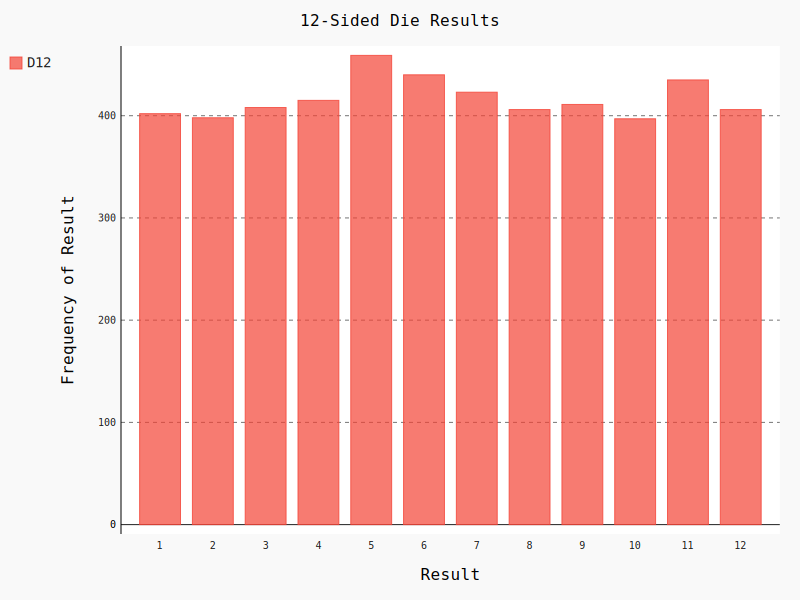

In [5]:
import pygal
from IPython.display import SVG, display

# Visualize results
hist = pygal.Bar()

hist.title = f'{d.num_sides}-Sided Die Results'
hist.x_labels = list(range(1, d.num_sides+1))
hist.x_title = 'Result'
hist.y_title = 'Frequency of Result'

hist.add(f'D{d.num_sides}', frequencies)
display(SVG(hist.render(disable_xml_declaration=True)))

# hist.render_to_file('die_visual.svg')

In [6]:
# Roll 2 dice
def roll_two(x, y):
    global die_1
    die_1 = Die(x)
    global die_2
    die_2 = Die(y)
    result_1 = die_1.roll()
    result_2 = die_2.roll()
    return result_1 + result_2

# Test out a roll with 2 six-sided die
roll_two(6, 6)

6

In [7]:
results = [roll_two(6, 6) for i in range(5000)]
results

max_roll = die_1.num_sides + die_2.num_sides

frequencies = []
for value in range(2, max_roll+1):
    freq = results.count(value)
    frequencies.append(freq)

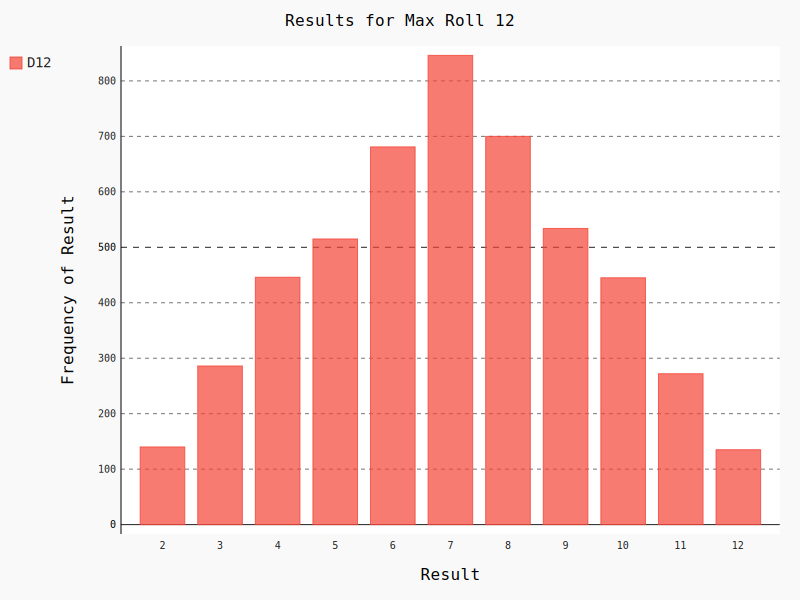

In [8]:
# Visualize results
hist = pygal.Bar()

hist.title = f'Results for Max Roll {max_roll}'
hist.x_labels = list(range(2, max_roll+1))
hist.x_title = 'Result'
hist.y_title = 'Frequency of Result'

hist.add(f'D{max_roll}', frequencies)
display(SVG(hist.render(disable_xml_declaration=True)))